In [9]:
#Imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.322266
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,287.923645
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,287.814392


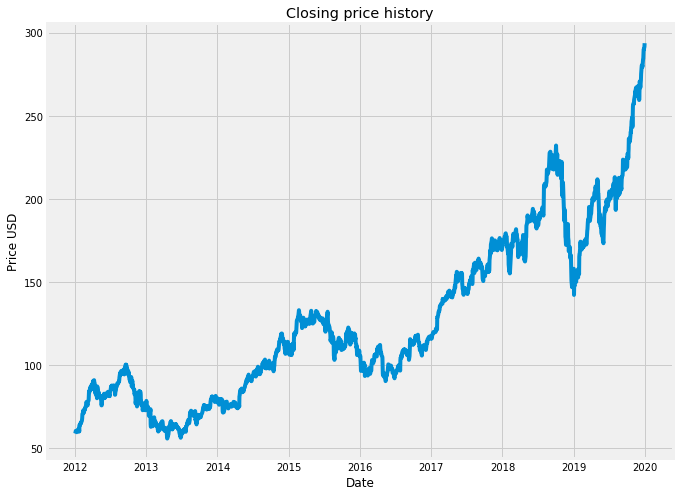

In [6]:
#Visualize the closing price history
plt.figure(figsize=(10, 8))
plt.title("Closing price history")
plt.plot(df.Close)
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.show()

In [7]:
#Create a new dataframe with only the Close column
data = df[['Close']]
#Convert to numpy array
dataset = data.values

dataset

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [289.79998779],
       [291.51998901],
       [293.6499939 ]])

In [8]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(dataset)
scaled_df

array([[0.01243228],
       [0.0137596 ],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [12]:
#Create training data
train_len = int(len(df) * 0.8)
train_data = scaled_df[0: train_len, :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [13]:
X_train

[array([0.01243228, 0.0137596 , 0.01651631, 0.01914091, 0.01873851,
        0.0196454 , 0.01923099, 0.0185343 , 0.01758538, 0.02052227,
        0.02317089, 0.02235408, 0.01787967, 0.02214988, 0.01794572,
        0.0337113 , 0.03249209, 0.03408368, 0.03752507, 0.03960912,
        0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
        0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
        0.06434756, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
        0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123616,
        0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
        0.09096586, 0.09287577, 0.0969778 , 0.10664737, 0.11954812,
        0.11713373, 0.11713972, 0.12646695, 0.12938582, 0.12730777,
        0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876]),
 array([0.0137596 , 0.01651631, 0.01914091, 0.01873851, 0.0196454 ,
        0.01923099, 0.0185343 , 0.01758538, 0.02052227, 0.02317089,
        0.02235408, 0.01787967, 0.02214988, 0.

In [14]:
y_train

[0.13172814323221588,
 0.12553603586771372,
 0.13699536369770005,
 0.14341568574181074,
 0.14040671608698585,
 0.14603426876761022,
 0.1475657929449749,
 0.14288718352453594,
 0.14154185558260735,
 0.13948179711281966,
 0.12894738825699953,
 0.11387251764413808,
 0.13163204608813894,
 0.1308152524386334,
 0.1182628356323463,
 0.10957826472485854,
 0.10880948757224324,
 0.1019507303270687,
 0.1318122442708573,
 0.13043086386232577,
 0.12760809044293692,
 0.11618478300440538,
 0.11507369986995131,
 0.11738596523021855,
 0.11488750363451522,
 0.10493567569587436,
 0.1074761878108984,
 0.10669541455284759,
 0.1072960217033283,
 0.10810078717225013,
 0.10581254609800206,
 0.10071349563465248,
 0.09768050169380837,
 0.09342230124113182,
 0.0838368356454971,
 0.08399297746704798,
 0.10255130540240115,
 0.09996277679048687,
 0.10812481145826935,
 0.10497772621519502,
 0.10315791060559965,
 0.1091518256292302,
 0.11329593477967659,
 0.1124310925581326,
 0.10237713734754883,
 0.10435909283141287

In [15]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1549, 60, 1)

In [18]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
#Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

1549/1549 [==============================] - 33s 21ms/step - loss: 7.4438e-04


In [21]:
#Create testing data
test_data = scaled_df[train_len-60:, :]

X_test = []
y_test = dataset[train_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [22]:
#Convert to numpy array
X_test = np.array(X_test)

#Reshape

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
#Predictions

yhat = model.predict(X_test)
yhat = scaler.inverse_transform(yhat)


In [24]:
#Evaluation of model
rmse = np.sqrt(np.mean(yhat - y_test)**2)
rmse

5.856370949567696

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


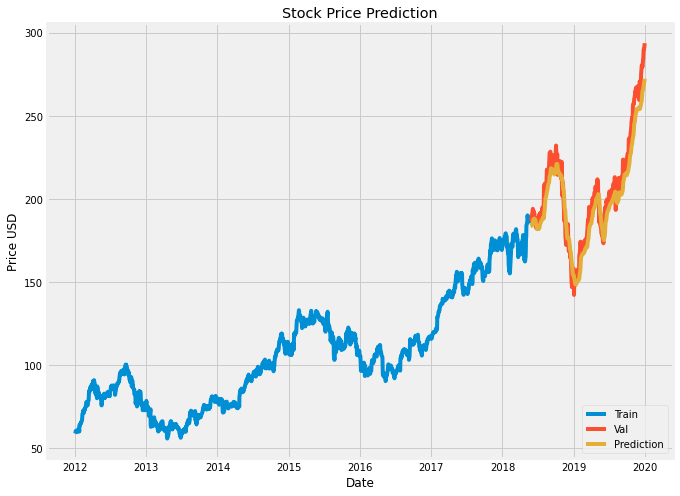

In [25]:
#Plot the data
train = data[: train_len]
valid = data[train_len: ]
valid['Predictions'] = yhat

plt.figure(figsize=(10, 8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [26]:
#Show actual and predicted price
valid

,Close,Predictions
Date,,
2018-05-25,188.580002,183.644318
2018-05-29,187.899994,183.872971
2018-05-30,187.500000,184.022430
2018-05-31,186.869995,184.078629
2018-06-01,190.240005,184.017227
...,...,...
2019-12-24,284.269989,266.691132
2019-12-26,289.910004,267.747864
2019-12-27,289.799988,269.284729


In [27]:
apple_data = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')

new_df = apple_data[['Close']]

last_60 = new_df[-60:].values

#Scale data

last_60_scaled = scaler.transform(last_60)

X_test_new = []

X_test_new.append(last_60_scaled)

#convert to numpy array
X_test_new = np.array(X_test_new)

X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], 1))

#Get predictions

pred = model.predict(X_test_new)

#undo scaling

pred = scaler.inverse_transform(pred)
pred

array([[273.83118]], dtype=float32)

In [29]:
actual = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end='2020-01-02')

In [31]:
actual.Close.values

array([300.3500061])